# Project 1: Write a data science blog post

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience

### Business Questions

1) What types of listings are popular?

2) When is the best time of the year to rent out a place?

3) How well can we predict the price of a listing? What aspects correlate well to listing prices?

In [1]:
# Import statements

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Load datasets

calendar_df = pd.read_csv('./data/calendar.csv')
listings_df = pd.read_csv('./data/listings.csv')
reviews_df = pd.read_csv('./data/reviews.csv')

### Explore *listings.csv*

In [3]:
# Rename id column to listing_id to match with other dfs
listings_df = listings_df.rename(columns={'id':'listing_id'})

listings_df.head(20)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern Hou

In [4]:
# Check if there are duplicating rows for listing_ids
print("Max occurances for listing_id: ", listings_df['listing_id'].value_counts().max())

# Remove columns with more than 75% NaNs
drop_cols = listings_df.columns[listings_df.isnull().mean() > .75]
print(drop_cols)
listings_df = listings_df.drop(drop_cols, axis=1)

Max occurances for listing_id:  1
Index(['square_feet', 'license'], dtype='object')


In [5]:
listings_df.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern hou

### 1) What types of listings are popular?

In [6]:
# Checking the counts for room_type
listings_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [7]:
# Separate dfs by room_type and remove rows without any reviews
listing_type_cols = ['neighbourhood_group_cleansed', 'property_type',
                     'accommodates', 'bathrooms', 'bedrooms', 'beds',
                     'bed_type', 'amenities', 'number_of_reviews']

entire_df = listings_df[(listings_df['room_type'] == 'Entire home/apt') & (listings_df['number_of_reviews'] > 0)][listing_type_cols]
private_df = listings_df[(listings_df['room_type'] == 'Private room') & (listings_df['number_of_reviews'] > 0)][listing_type_cols]
shared_df = listings_df[(listings_df['room_type'] == 'Shared room') & (listings_df['number_of_reviews'] > 0)][listing_type_cols]

In [8]:
entire_df.head()

,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,number_of_reviews
0,Queen Anne,Apartment,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207
1,Queen Anne,Apartment,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43
2,Queen Anne,House,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20
4,Queen Anne,House,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38
9,Queen Anne,Apartment,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",32


In [9]:
# Sort dfs by number_of_reviews
entire_df.sort_values(by=['number_of_reviews'], ascending=False, inplace=True)
private_df.sort_values(by=['number_of_reviews'], ascending=False, inplace=True)
shared_df.sort_values(by=['number_of_reviews'], ascending=False, inplace=True)

In [10]:
print('''Number of listings by accommodation type:\n Entire Place: {}\n Private Room: {}\n Shared Room: {}'''
      .format(len(entire_df), len(private_df), len(shared_df)))

Number of listings by accommodation type:
 Entire Place: 2141
 Private Room: 957
 Shared Room: 93


### a. Plot heatmaps for popular and unpopular listings by neighbourhood and property type 
*Popularity is defined by the number of reviews present*


<ipython-input-11-da513b151cd1>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


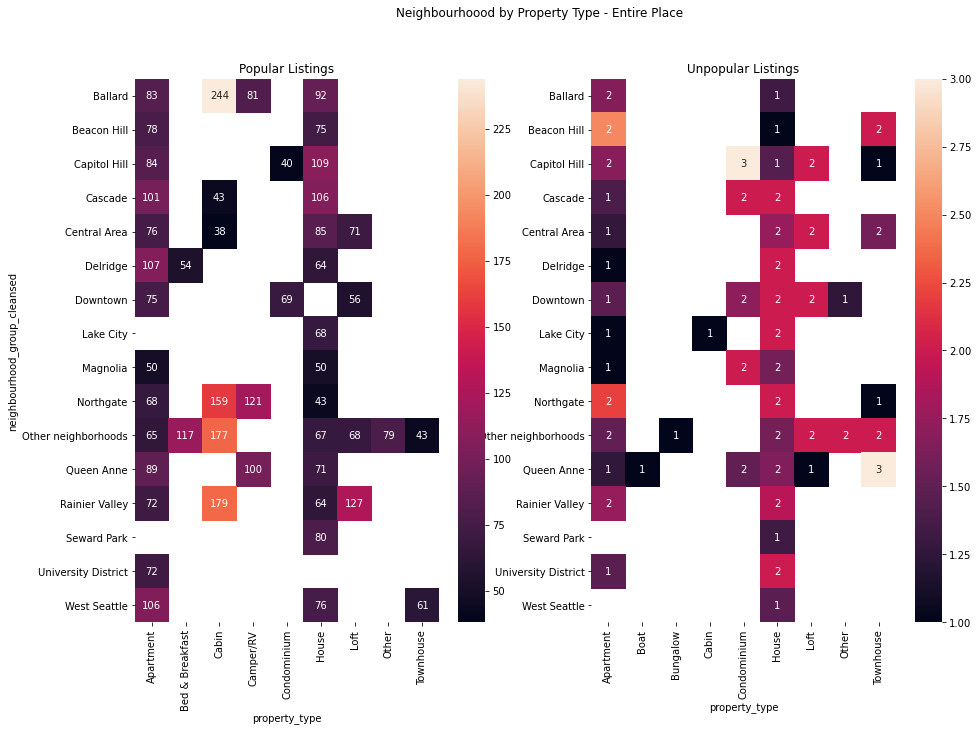

In [11]:
# Entire Place

entire_20 = math.floor(len(entire_df)*.2)
popular_entire_df = entire_df.head(entire_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()
unpopular_entire_df = entire_df.tail(entire_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()

fig, ax =plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Neighbourhoood by Property Type - Entire Place')

sns.heatmap(popular_entire_df,annot=True, fmt=".0f", ax=ax[0])
sns.heatmap(unpopular_entire_df,annot=True, fmt=".0f", ax=ax[1])

ax[0].set_title('Popular Listings')
ax[1].set_title('Unpopular Listings')

fig.show();

For listings with entire place rented, Apartments and Houses are frequent listings. However, the most popular properties appear to be Bed&Breakfast, Cabin, and Camper/RV located in following neighbourhoods: Rainier Valley, Queen Anne, Northgate,  and Ballard. Note that these types of properties are not available in every neighbourhoods. Among the most unpopular listings, Apartments and Houses had the lowest review counts.

<ipython-input-12-48d59cab8c3f>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


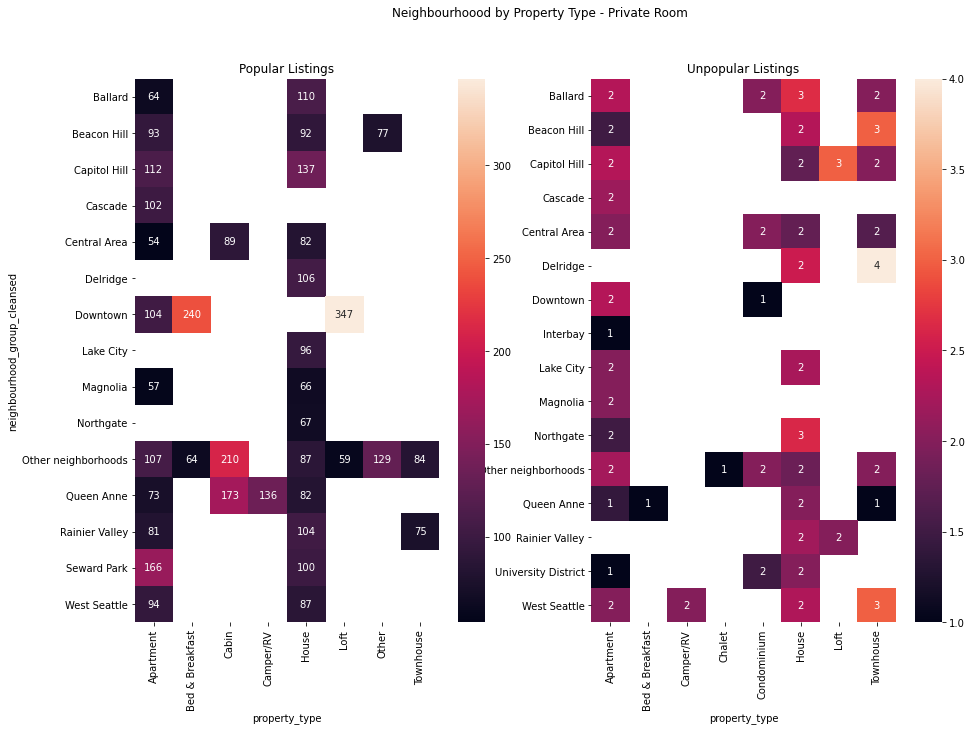

In [12]:
# Private Room

private_20 = math.floor(len(private_df)*.2)
popular_private_df = private_df.head(private_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()
unpopular_private_df = private_df.tail(private_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()

fig, ax =plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Neighbourhoood by Property Type - Private Room')

sns.heatmap(popular_private_df,annot=True, fmt=".0f", ax=ax[0])
sns.heatmap(unpopular_private_df,annot=True, fmt=".0f", ax=ax[1])

ax[0].set_title('Popular Listings')
ax[1].set_title('Unpopular Listings')

fig.show();

For listings with private rooms, the most popular listings are located in Downtown and Queen Anne. In Downtown, Bed&Breakfasts and Lofts had the most rental activities, wheras Queen Anne had most reviews for Cabins and Camper/RVs. Among the least popular listings, still the apartments and houses had least average reviews. They are consistent across the neighbourhoods.

<ipython-input-13-1c1b00429cc1>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


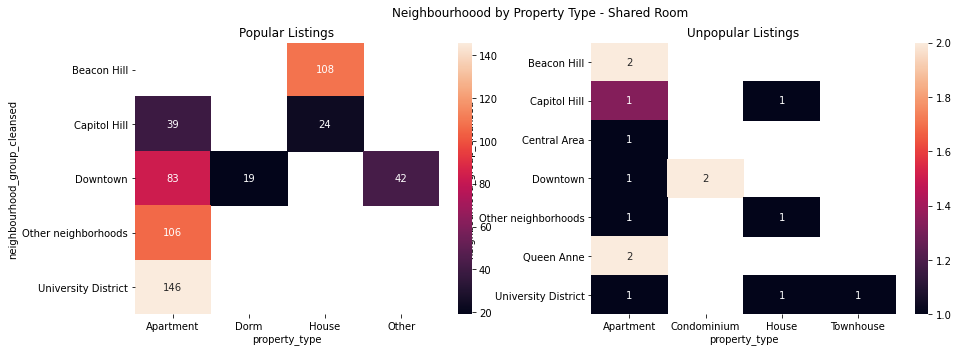

In [13]:
# Shared Room

shared_20 = math.floor(len(shared_df)*.2)
popular_shared_df = shared_df.head(shared_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()
unpopular_shared_df = shared_df.tail(shared_20).groupby(['neighbourhood_group_cleansed', 'property_type']).number_of_reviews.mean().unstack()

fig, ax =plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Neighbourhoood by Property Type - Shared Room')

sns.heatmap(popular_shared_df,annot=True, fmt=".0f", ax=ax[0])
sns.heatmap(unpopular_shared_df,annot=True, fmt=".0f", ax=ax[1])

ax[0].set_title('Popular Listings')
ax[1].set_title('Unpopular Listings')

fig.show();

For units with shared rooms, Apartments in University District was the most popular listing type.

### b. Observe accommodation details by popularity and check if there is any pattern
*Popularity is defined by the number of reviews present*


In [14]:
# Entire Place
popular_accom_entire_df = entire_df.head(entire_20).groupby(['accommodates', 'bedrooms', 'beds', 'bed_type', 'bathrooms']).number_of_reviews.mean()
popular_accom_entire_df = popular_accom_entire_df.rename('average_review_count').reset_index()
popular_accom_entire_df.sort_values(by=['average_review_count'], ascending=False, inplace=True)

unpopular_accom_entire_df = entire_df.head(entire_20).groupby(['accommodates', 'bedrooms', 'beds', 'bed_type', 'bathrooms']).number_of_reviews.mean()
unpopular_accom_entire_df = unpopular_accom_entire_df.rename('average_review_count').reset_index()
unpopular_accom_entire_df.sort_values(by=['average_review_count'], ascending=True, inplace=True)

print("\nPopular Listings\n", popular_accom_entire_df.head(20))
print("\nUnpopular Listings\n", unpopular_accom_entire_df.head(20))


Popular Listings
     accommodates  bedrooms  beds       bed_type  bathrooms  \
16             4       0.0   1.0       Real Bed        1.0   
55             6       3.0   4.0       Real Bed        1.0   
77            10       3.0   3.0       Real Bed        2.0   
48             6       2.0   3.0       Real Bed        1.5   
31             5       0.0   1.0       Real Bed        1.0   
22             4       1.0   2.0       Real Bed        2.0   
56             6       3.0   4.0       Real Bed        1.5   
35             5       1.0   4.0       Real Bed        1.0   
45             6       2.0   2.0       Real Bed        1.0   
58             6       3.0   4.0       Real Bed        2.5   
4              2       1.0   1.0       Real Bed        1.0   
0              2       0.0   1.0  Pull-out Sofa        1.0   
18             4       1.0   1.0          Futon        1.0   
3              2       1.0   1.0          Futon        1.0   
6              2       1.0   2.0       Real Bed    

In [15]:
# Private Room
popular_accom_private_df = private_df.head(private_20).groupby(['accommodates', 'bedrooms', 'beds', 'bed_type', 'bathrooms']).number_of_reviews.mean()
popular_accom_private_df = popular_accom_private_df.rename('average_review_count').reset_index()
popular_accom_private_df.sort_values(by=['average_review_count'], ascending=False, inplace=True)

unpopular_accom_private_df = private_df.head(private_20).groupby(['accommodates', 'bedrooms', 'beds', 'bed_type', 'bathrooms']).number_of_reviews.mean()
unpopular_accom_private_df = unpopular_accom_private_df.rename('average_review_count').reset_index()
unpopular_accom_private_df.sort_values(by=['average_review_count'], ascending=True, inplace=True)

print("\nPopular Listings\n", popular_accom_private_df.head(20))
print("\nUnpopular Listings\n", unpopular_accom_private_df.head(20))


Popular Listings
     accommodates  bedrooms  beds       bed_type  bathrooms  \
20             3       1.0   3.0       Real Bed        1.0   
14             2       1.0   2.0       Real Bed        2.0   
8              2       1.0   1.0       Real Bed        1.5   
13             2       1.0   2.0       Real Bed        1.5   
1              1       1.0   1.0       Real Bed        1.0   
12             2       1.0   2.0       Real Bed        1.0   
21             4       1.0   1.0       Real Bed        1.0   
18             3       1.0   2.0       Real Bed        1.0   
26             5       1.0   3.0  Pull-out Sofa        1.0   
7              2       1.0   1.0       Real Bed        1.0   
6              2       1.0   1.0  Pull-out Sofa        1.0   
22             4       1.0   2.0       Real Bed        1.0   
11             2       1.0   1.0       Real Bed        3.0   
16             3       1.0   1.0       Real Bed        1.0   
5              2       1.0   1.0          Futon    

When observed 20 most rated and 20 least rated listings (entire place & private room), I could not observe any patterns for both popular and unpopular listings. This suggests that accomodation details such as number of guests allowed, number of bedrooms/bathrooms, or bed type do not contribute to the popularity of listings.

### c. Check what kind of amenities are offered in popular listings 
*Popularity is defined by the number of reviews present*


In [16]:
# Entire Place
popular_amen_entire_df = entire_df.head(20)[['amenities', 'number_of_reviews']]
popular_amen_entire_df.sort_values(by=['number_of_reviews'], ascending=False, inplace=True)

popular_amen_lst = popular_amen_entire_df['amenities'].to_list()
popular_amen_lst = ','.join(popular_amen_lst)
popular_amen_lst = popular_amen_lst.translate(str.maketrans({'{': '', '}': '', '"': ''})).strip().split(',')
popular_amen_lst = set(popular_amen_lst)


unpopular_amen_entire_df = entire_df.tail(20)[['amenities', 'number_of_reviews']]
unpopular_amen_entire_df.sort_values(by=['number_of_reviews'], ascending=True, inplace=True)

unpopular_amen_lst = unpopular_amen_entire_df['amenities'].to_list()
unpopular_amen_lst = ','.join(unpopular_amen_lst)
unpopular_amen_lst = unpopular_amen_lst.translate(str.maketrans({'{': '', '}': '', '"': ''})).strip().split(',')
unpopular_amen_lst = set(unpopular_amen_lst)

unique_popular_amen = popular_amen_lst - unpopular_amen_lst
unique_unpopular_amen = unpopular_amen_lst - popular_amen_lst

In [17]:
print(unique_popular_amen) # What's available in popular listings are also available in unpopular listings 
print(unique_unpopular_amen)

set()
{'Hot Tub', '', 'Doorman', 'Pool', 'Wheelchair Accessible'}


In [18]:
# Private Room
popular_amen_private_df = private_df.head(20)[['amenities', 'number_of_reviews']]
popular_amen_private_df.sort_values(by=['number_of_reviews'], ascending=False, inplace=True)

popular_amen_lst = popular_amen_private_df['amenities'].to_list()
popular_amen_lst = ','.join(popular_amen_lst)
popular_amen_lst = popular_amen_lst.translate(str.maketrans({'{': '', '}': '', '"': ''})).strip().split(',')
popular_amen_lst = set(popular_amen_lst)


unpopular_amen_private_df = private_df.tail(20)[['amenities', 'number_of_reviews']]
unpopular_amen_private_df.sort_values(by=['number_of_reviews'], ascending=True, inplace=True)

unpopular_amen_lst = popular_amen_private_df['amenities'].to_list()
unpopular_amen_lst = ','.join(unpopular_amen_lst)
unpopular_amen_lst = unpopular_amen_lst.translate(str.maketrans({'{': '', '}': '', '"': ''})).strip().split(',')
unpopular_amen_lst = set(unpopular_amen_lst)

unique_popular_amen = popular_amen_lst - unpopular_amen_lst
unique_unpopular_amen = unpopular_amen_lst - popular_amen_lst

print(unique_popular_amen)
print(unique_unpopular_amen)

set()
set()


According to my analysis, available amenities are not the factors of popular listings since everything available in popular listings are also available in unpopular listings

### d. Conclusion
According to my analysis, the popularity of a listing is defined by type and the location of the property. The trend differs by the room_type (ie. entire place, private room, and shared room). For listings with ehtire place, most popular listings were Bed&Breakfast, Cabin, and Camper/RV located in Rainier Valley, Queen Anne, Northgate, and Ballard. For listings with private rooms, Bed&Breakfast, Cabin in Downtown and Queen Anne were popular. For shared units, apartments in University District was the most popular listing type.

### 2) When is the best time of the year to rent out a place?

In [19]:
# Observe the data
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [21]:
# Convert string date to datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [22]:
# Remove columns with more than 75% NaNs
drop_cols = calendar_df.columns[calendar_df.isnull().mean() > .75]
print(drop_cols) # Did not need to remove any columns

Index([], dtype='object')


In [23]:
# Convert column values into boolean
bool_encoder = lambda x: 0 if x == 't' else 1 # not available=1, available=0
calendar_df['available'] = calendar_df['available'].map(bool_encoder)
calendar_df = calendar_df.rename(columns={'available':'not_available'})
calendar_df['not_available'].value_counts()

0    934542
1    459028
Name: not_available, dtype: int64

In [24]:
# Aggregate calendar_df to extract occupancy_rate
num_listing_df = calendar_df[['date','listing_id']].groupby('date').count()
num_listing_df = num_listing_df.rename(columns={'listing_id':'num_listing'})

occupancy_df = calendar_df[['date', 'not_available']].groupby('date').mean()
occupancy_df = pd.concat([occupancy_df, num_listing_df], axis=1)
occupancy_df.head()

,not_available,num_listing
date,,
2016-01-04,0.545574,3818
2016-01-05,0.511001,3818
2016-01-06,0.521739,3818
2016-01-07,0.534835,3818
2016-01-08,0.533263,3818


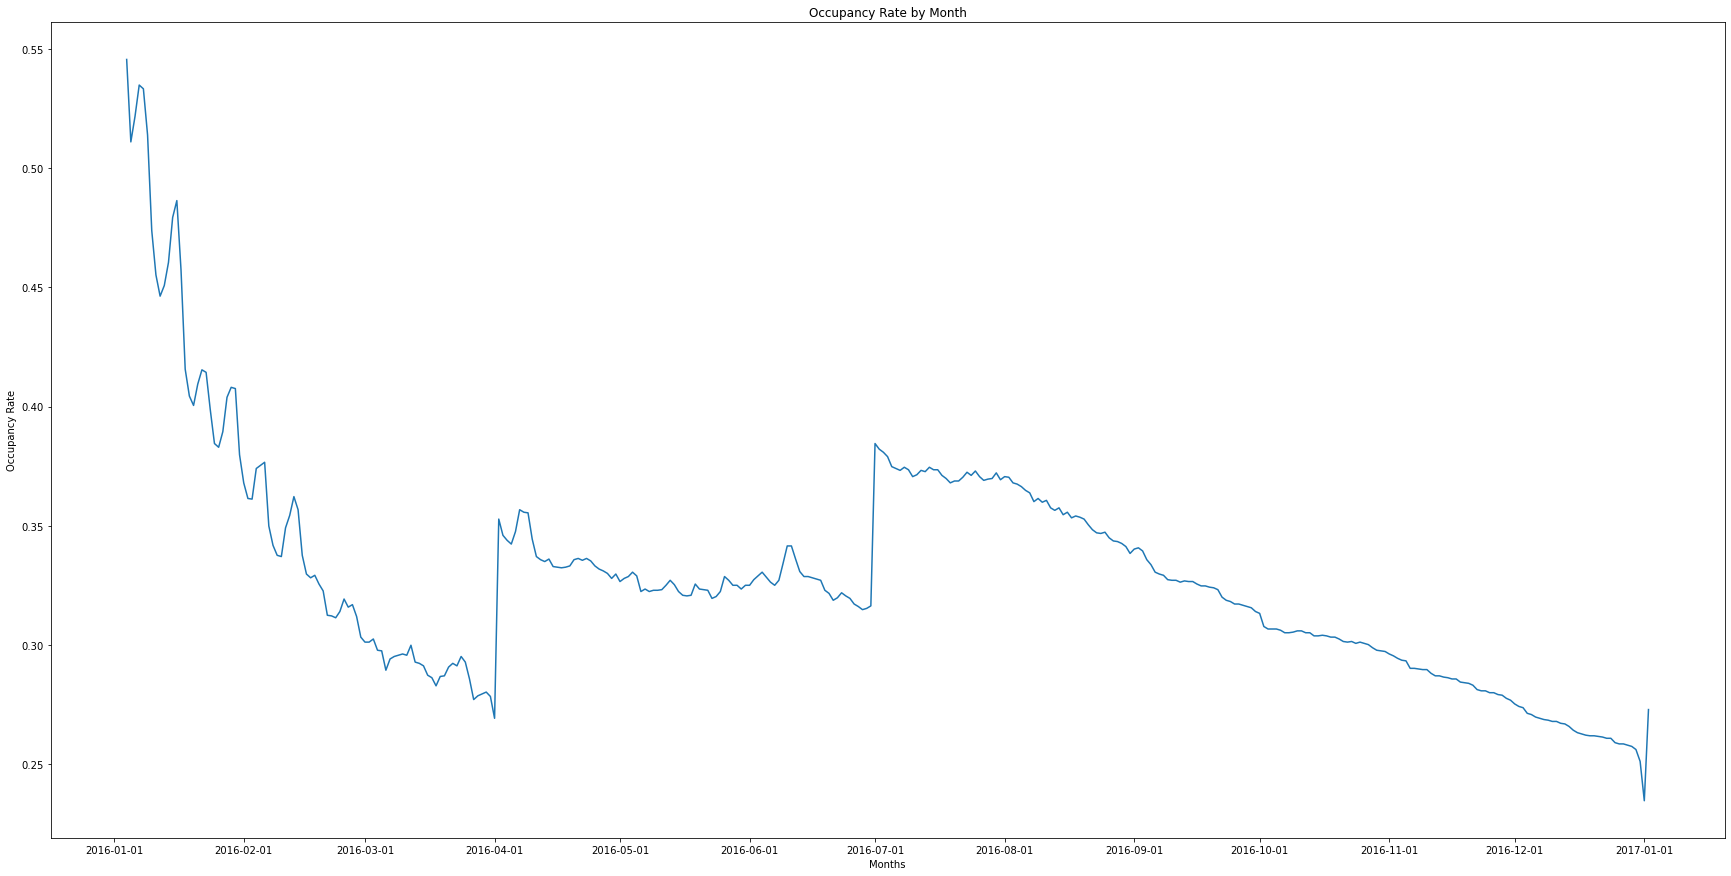

In [25]:
# Plot occupancy rate by month to observe the pattern

plt.figure(figsize=(30,15))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Occupancy Rate by Month')
plt.xlabel('Months')
plt.ylabel('Occupancy Rate')
plt.plot(occupancy_df.index, occupancy_df.not_available)
plt.show()

To answer Q2, I extracted the occupancy information by dates from *calendar.csv* and plotted a line graph. This is done by aggregating the data by dates and averaging the the counts of listings that are not available. This imposes an assumption that unavailable listings are already occupied by other users.

The overall trend shows declining occupancy rates. This could mean that more listings are being introduced as the time passes. However, we can see that it is not the case because the number of listings by month is fixed to 3818. Thus, we can translate that AirBNB renting activity in Seattle is decreasing.

There is a steep increase of occupancy in April 2016 which remains high until it shows another spike in July 2016 that starts to decline after Auguest 2016. This ties well with summar vacation time. If a host aims to make a greater profit in Seattle area, he/she should target users renting between April and Augest. There is another surge in January 2017, which could be contributed by the end-of-the-year holiday season.

### 3) How well can we predict the price of a listing? What aspects correlate well to listing prices?

In [26]:
df_cols = ['neighbourhood_group_cleansed', 'property_type',
          'accommodates', 'bathrooms', 'bedrooms', 'beds','bed_type',
          'guests_included', 'requires_license', 'instant_bookable', 'review_scores_rating']

def clean_data(df, cols, target_col):
    # Fill numeric columns with the mean
    df = df[listings_df['price'].notnull()].reset_index()
    
    y = df[target_col]
    rm_sign = lambda x: float(x.translate(str.maketrans({'$': '', ',': ''})))
    y = y.apply(rm_sign)
    
    df = df[cols]
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    X = df
    
    return X, y

X, y = clean_data(listings_df, df_cols, 'price')

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=100) 

# Instantiate the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) #Fit

# Predict using the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using the model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [28]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5599684107211147.  The rsquared on the test data was 0.5217032427911793.


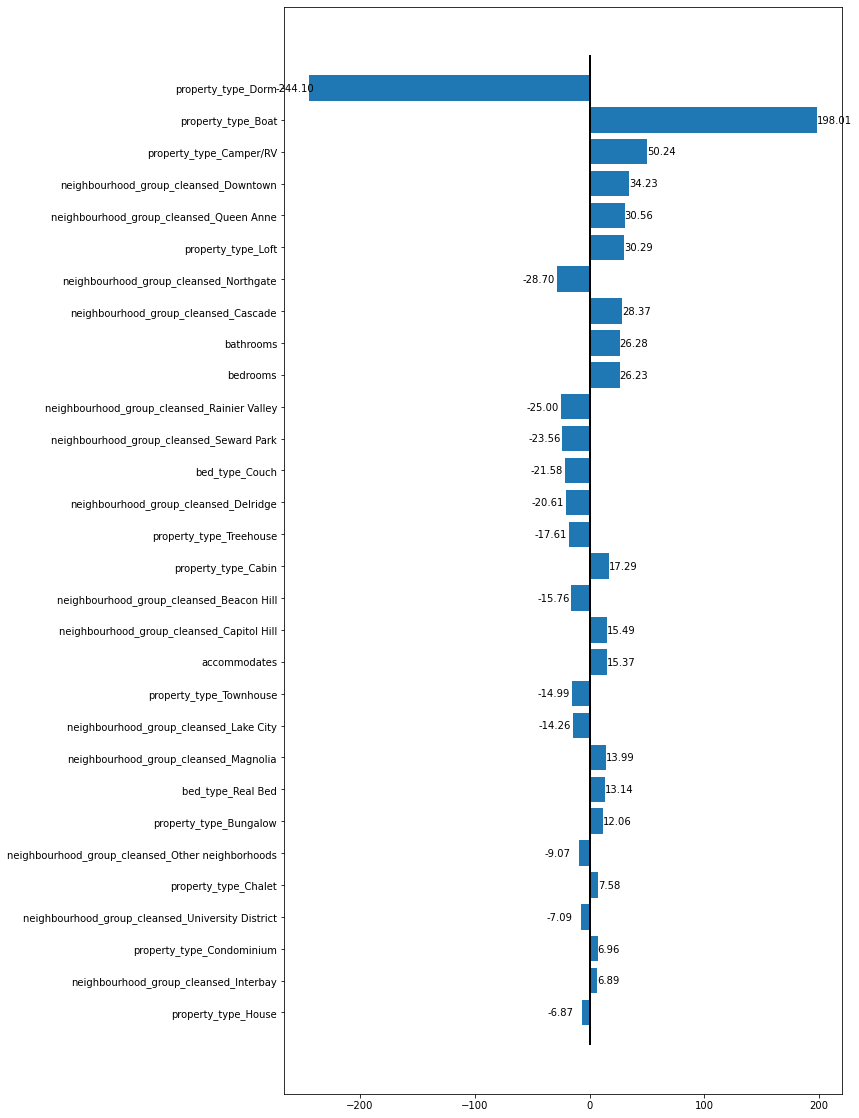

In [64]:
# Plotting feature importance

coef = lm_model.coef_
ind = np.argsort(-abs(coef))

x = range(30)
y = coef[ind][:30]
    
plt.figure(figsize=(10,20))
ax = plt.subplot()
    
plt.plot([0] * (32), range(-1,31), 'k', linewidth=2)

plt.gca().invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind][:30])

plt.barh(x, y)

for rect, label in zip(ax.patches, y):
    if label >= 0:
        width = rect.get_width() + 0.01
    else:
        width = rect.get_width() - 30
    label = '{:.2f}'.format(label)
    ax.text(width, rect.get_y()+0.5, label)
    
plt.show()

Just like popularity, property type and location(neighbourhood) appears to be the main factors for pricing.